# Latent Variable Models
Latent variable models are unsupervised techniques that allow to estimate complex probability distributions from simpler ones. In particular they introduce some latent variables (variables that are not directly observed) and define a joint distribution over observed and latent variables. Then the distribution over the observed variables (the one we are interested in) is obtaine through marginalization. This technique allows to express a complex marginal distribution using a simpler joint distribution over the expanded space of observed and latent variables.

## Gaussian Mixture Model
One of the most used latent variable model is the Gaussian Mixture Model (GMM), in which we use gaussian distributions to model the joint and conditional distributions. First we introduce the latent random vector $\mathbf{z} = (z_1,...,z_k)^T$ as:
$$
p(\mathbf{z}) = 
\begin{cases}
\pi_1 \quad\text{if}\quad z_1 = 1 \\
\pi_2 \quad\text{if}\quad z_2 = 1 \\
.\\
.\\
\pi_k \quad\text{if}\quad z_k = 1
\end{cases}
$$
Using a one-hot encoding the probability distribution over the latent variables can be also written as:
$$
p(\mathbf{z}) = \prod_{i=1}^k \pi_i^{z_i}
$$
In the following we will use this one-hot representation and we will denote with $\mathbf{z}$ the random vector and with $z_i$ the $i^{\text{th}}$ component of the random vector.
Once we have defined the latent distribution (distribution over the latent random variables) we can define the conditional distribution:
$$
p(\mathbf{x}|\mathbf{z}) = \prod_{i=1}^k N(\mathbf{x} | \mu_i,\Sigma_i)^{z_i}
$$
The distribution over the observed variables is obtained through marginalization (summing over all possible states of z):
$$
p(\mathbf{x}) = \sum_z p(\mathbf{z}) p(\mathbf{x}|\mathbf{z}) = \sum_{i=1}^k \pi_i N(\mathbf{x}|\mu_i,\Sigma_i)
$$
We can interpret the GMM as follows: we use k gaussians to explain the data, the distribution over the latent variables is the prior distribution over the k gaussians, while the conditional distribution expresses the probability that an observation is explained by a specific gaussian. The marginal distribution instead uses all the gaussians, wheighted by their probabilities to explain the observation (in a pure Bayesian approach, but we will come back to this in another lecture).
Anothe rimportant term is the __responsibility__ that measures the responsibility that the $k^{\text{th}}$ component takes in explaining the observation x:
$$
\gamma(z_{nk}) = p(z_k=1 |\mathbf{x_n}) = \frac{\pi_k N(x_n|\mu_k,\Sigma_j)}{\sum_j \pi_j N(x_n|\mu_j,\Sigma_j)}
$$
Given a dataset with the observed variables:
$$
\mathbb{X} = \begin{pmatrix}
- x_1 - \\
- x_2 - \\
...\\
...\\
- x_n -
\end{pmatrix}
$$
We want to maximize the log likelihood of the marginal distribution (distribution over the observed variables):
$$
\begin{matrix}max\\ \mathbf{\pi},\mathbf{\mu},\mathbf{\Sigma}\end{matrix}\quad ln(p(\mathbb{X}|\mathbf{\pi},\mathbf{\mu},\mathbf{\Sigma})) = \sum_{i=1}^N ln\{ \sum_{k=1}^K \pi_k N(x_n | \mathbf{\mu_k},\Sigma_k) \}
$$
The minimization of the log likelihood does not admit a closed form solution. While gradient-based techniques are feasible usually this model is optimized through the Expectation Maximization (EM) algorithm that consists in the following steps:
- 1) __Initialization__: Initialize $\mu_1,...,\mu_k$ amd $\Sigma_1,...,\Sigma_k$ (either at random or better using kmeans, where $\Sigma_k$ is the sample covariance matrix of the kth cluster)
- 2) __E step__: Compute the responsibilities using the current values of the parameters
- 3) __M step__: Estimate the values of the parameters using the current values of the responsibilities
- 4) Compute the log likelihood with the current value of the parameters $L_t$ and repeat steps 2) to 4) untill $|L_t - L_{t-1}| < \epsilon$

## Example
All the concepts we have seen so far are best understood through an example.
Let's assume for simplicity we have a 1D dataset recording the height of the students in the university. Using the terminology we have introduced so far, the height is the __observed variable__ however we know that there is at least one __unobsered variable__ that could help us model the probability distribution over our data: the gender. Indeed we know that the distribution of the male students is different from the distribution of the female students. So we could model the gender with the unobservable vector $z$ where:
$$
p(z) = \begin{cases}
\pi_0 \quad if \quad \mathbf{z} = 0 \\
\pi_1 \quad if \quad \mathbf{z} = 1
\end{cases} 
$$
Note that we do not know neither the latent distribution nor the conditional and marginal distributions, but estimate them from the data.

First we create a syntetic dataset. We assume that males are tall on average 1.75 m with a standard deviation of 0.12 m while females are tall on average 1.65 m with a standard deviation of 0.08 m.
These are reasonable assumptions considering that for an approximately normal data set, the values within one standard deviation of the mean account for about 68% of the set; while within two standard deviations account for about 95%; and within three standard deviations account for about 99.7%.
We create a dataset with 2000 females and 1400 males.

It is important to note that these parameters (average hight, standard deviation and number of males and female) __are unknown__. We are using known values to generate a syntetic dataset since we do not have a real one.

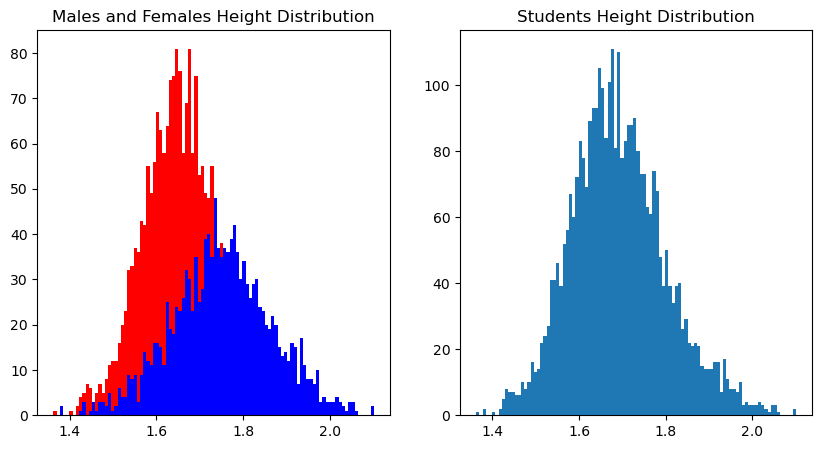

In [1]:
import numpy as np
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt
np.random.seed(9)

females = np.random.normal(loc=1.65,scale=0.08,size=2000)
males = np.random.normal(loc=1.75,scale=0.12,size=1400)

X = np.concatenate([females,males],axis=0)
fig,ax = plt.subplots(1,2)
fig.set_size_inches(10,5)
ax[0].hist(females,bins=100,range=(np.min(X),np.max(X)),color='r')
ax[0].hist(males,bins=100,range=(np.min(X),np.max(X)),color='b')
ax[0].set_title("Males and Females Height Distribution")
ax[1].hist(X,bins=100,range=(np.min(X),np.max(X)))
ax[1].set_title("Students Height Distribution")
plt.show()


Remember that in a real scenario we have only the data matrix X.

In [2]:
from sklearn.mixture import GaussianMixture

X = X[:,None]
gmm = GaussianMixture(
    n_components=2,
    covariance_type="full"
)
gmm.fit(X)
pi = gmm.weights_
mu = np.reshape(gmm.means_,-1)
va = np.reshape(gmm.covariances_,-1)
print(f"z \t= {pi}")
print(f"mu \t= {mu}")
print(f"var \t= {va}")

z 	= [0.6090556 0.3909444]
mu 	= [1.64057103 1.77138156]
var 	= [0.0063813  0.01038152]


After training the model I can answer the following questions:

1) What is the probability of picking a male or a female? This question is asking for the latent distribution $p(z)$, that is the distribution of the latent variables

In [3]:
print(f"p(z) = {gmm.weights_}")

p(z) = [0.6090556 0.3909444]


I do not know which is the latent variable that represents gender male or gender female, however if I know that there are more female students than male students then I infer that $z_0$ is the latent variable associated with male gender while $z_1$ is the random variable associated with female gender.

2) Given that a person has height $h$ what is the probability that he/she is male or female? Here I can answer looking at the responsibilities $p(\mathbf{z}|\mathbf{x})$ as follows:
$$
p(\text{female} | x = h) = \gamma(z_{h0}) = \frac{\pi_0 N(h|\mu_0,\Sigma_0)}{\sum_j \pi_j N(h|\mu_j,\Sigma_j)}
$$
$$
p(\text{male} | x = h) = \gamma(z_{h1}) = \frac{\pi_1 N(h|\mu_1,\Sigma_1)}{\sum_j \pi_j N(h|\mu_j,\Sigma_j)}
$$

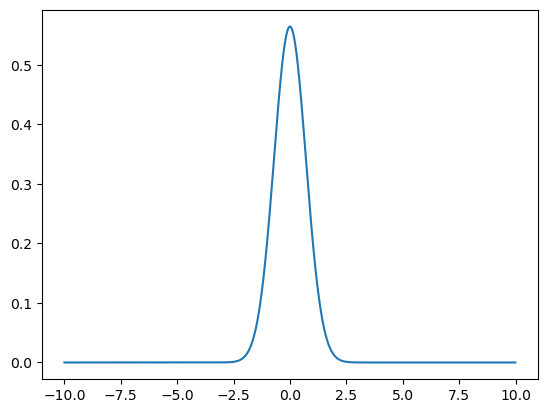

In [4]:
def gaussian(x,mu,var):
    return (1./(np.sqrt(2*var*np.pi)))*np.exp(-0.5*np.power(x-mu,2)/var)

x = np.arange(-10,10,10**-2)
plt.plot(x,gaussian(x,0,.5))
plt.show()

In [5]:
import scipy.integrate as integrate
integrate.quad(lambda x:gaussian(x,0,.5),-100,100)

(1.0000000000000002, 1.115302495269168e-10)

In [6]:
def conditional(height,pi,mu,var):
    den = pi[0]*gaussian(height,mu[0],var[0]) + pi[1]*gaussian(height,mu[1],var[1])
    return (pi[0]*gaussian(height,mu[0],var[0])/den, pi[1]*gaussian(height,mu[1],var[1])/den)

In [7]:
h = 1.75
c1,c2 = conditional(h,pi,mu,va)
print(f"p(female|x={h}) = {c1}")
print(f"p(male  |x={h}) = {c2}")

p(female|x=1.75) = 0.44285710020359953
p(male  |x=1.75) = 0.5571428997964004


3) What is the probability that a male student or a female student has height h? I can answer this question looking at the conditional probabilities:
$$
p(x|z) = \prod_{i=1}^k N(\mathbf{x} | \mu_k,\Sigma_k)^{z_k}
$$
hence
$$
\begin{align}
&p(x|female) &= N(\mathbf{x} | \mu_0,\Sigma_0)\\
&p(x|male) &= N(\mathbf{x} | \mu_1,\Sigma_1)
\end{align}
$$

In [8]:

h = 1.75
e = 0.01
def female_cond(h):
    return gaussian(h,mu[0],va[0])
def male_cond(h):
    return gaussian(h,mu[1],va[1])

print(f"p({h-e} <= x <= {h+e}|female) = {integrate.quad(female_cond,a=h-e,b=h+e)[0]}")
print(f"p({h-e} <= x <= {h+e}|male)   = {integrate.quad(male_cond,a=h-e,b=h+e)[0]}")

p(1.74 <= x <= 1.76|female) = 0.03917338381555492
p(1.74 <= x <= 1.76|male)   = 0.07648583142833133


4) What is the probability that a student picked at random has height h? We can answer this question using the marinal distribution that is the distribution over the observed variable p(x):
$$
p(\mathbf{x}) = \sum_z p(\mathbf{z}) p(\mathbf{x}|\mathbf{z}) = \sum_{i=0}^1 \pi_i N(\mathbf{x}|\mu_i,\Sigma_i)
$$

In [9]:
def marginal(h):
    return pi[0] * gaussian(h,mu[0],va[0]) + pi[1] * gaussian(h,mu[1],va[1])

In [10]:
h = 1.75
e = 0.01

print(f"p({h-e} <= x <= {h+e})   = {integrate.quad(marginal,a=h-e,b=h+e)[0]}")

p(1.74 <= x <= 1.76)   = 0.053760476401909243


Now we can compare the original distribution of observed and unobserved variables that we used to generate the dataset (in general we do not know these distributions) and the distributions obtained fitting the GMM.

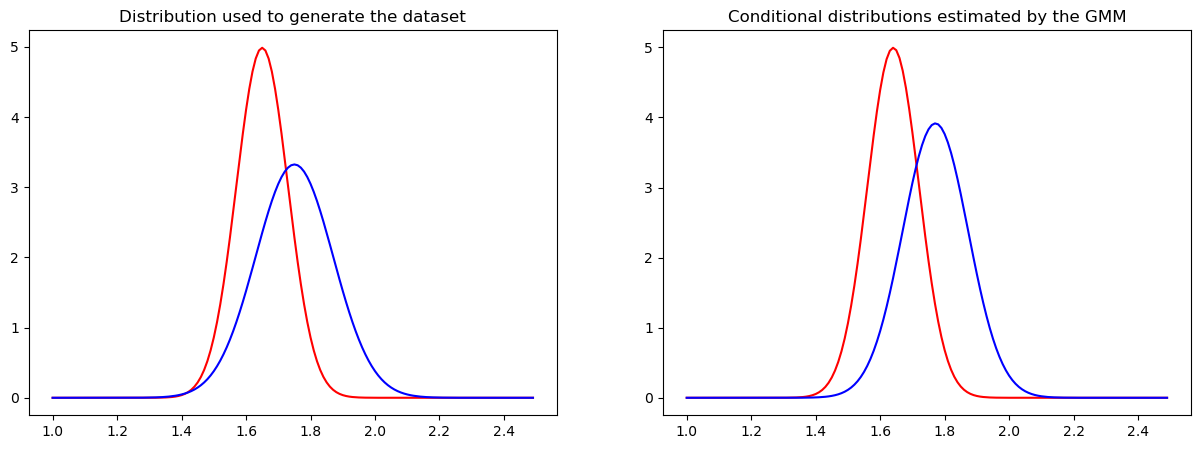

In [11]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
x = np.arange(1,2.5,10**-2)
ax[0].set_title("Distribution used to generate the dataset")
ax[0].plot(x,gaussian(x,1.65,0.08**2),c="r")
ax[0].plot(x,gaussian(x,1.75,0.12**2),c="b")

ax[1].set_title("Conditional distributions estimated by the GMM")
ax[1].plot(x,gaussian(x,mu[0],va[0]),c="r")
ax[1].plot(x,gaussian(x,mu[1],va[1]),c="b")

Moreover we know that the true latent distribution is:
$$
\begin{align}
&pr(z=\text{Female}) &= \frac{2000}{3400} = 59\% \\
&pr(z=\text{Male}) &= \frac{1400}{3400} = 41\% 
\end{align}
$$
While the latent distribution estimated from data by the GMM is:
$$
\begin{align}
&pr(z=\text{Female}) &= 61\% \\
&pr(z=\text{Male}) &= 39\% 
\end{align}
$$

## Soft Clustering
A Gaussian Mixture Model can be thought as a generalization of K-means, in which the clusters are represented by multivariate normal distributions. According to this interpretation the responsibilities:
$$
\gamma(z_{nk}) = p(z_k=1 |\mathbf{x_n}) = \frac{\pi_k N(x_n|\mu_k,\Sigma_j)}{\sum_j \pi_j N(x_n|\mu_j,\Sigma_j)}
$$
form a soft assignment, in the sense that $\gamma(z_{nk})$ is the probability that sample $x_n$ belongs to the cluster k.


In [12]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math

First we create a syntetic dataset where data are sampled from three multivariate normal distributions with different means anc covariance matrices:

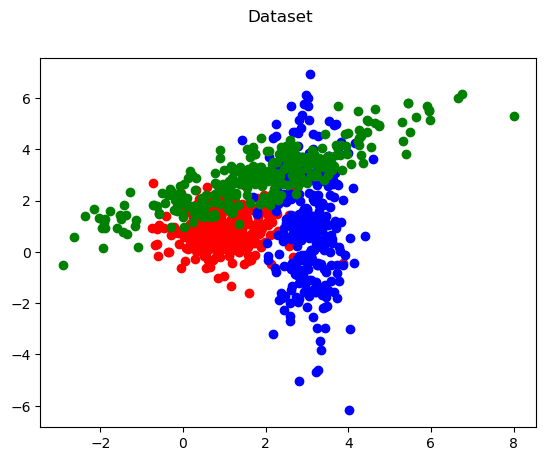

In [13]:
N = 900
K = 3
m1 = [1.,1.]
m2 = [3.,1.]
m3 = [2.,3.]
Theta = math.pi/6
R = np.asanyarray([[math.cos(Theta), -math.sin(Theta)],
                   [math.sin(Theta),math.cos(Theta)]])
cov1 = np.asarray(
    [[.5, .0],
     [.0, .5]])
cov2 = np.asarray(
    [[.5, .0],
     [.0, 2.]])
cov3 = R @ np.asarray(
    [[2., .0],
     [.0, .5]])
cov2 = cov2 @ cov2.T
cov3 = cov3 @ cov3.T

X_1 = np.random.multivariate_normal(mean=m1,cov=cov1,size=N//3)
X_2 = np.random.multivariate_normal(mean=m2,cov=cov2,size=N//3)
X_3 = np.random.multivariate_normal(mean=m3,cov=cov3,size=N//3)
X = np.concatenate([X_1,X_2,X_3],axis=0)

fig,ax = plt.subplots()
ax.scatter(x=X_1[:,0],y=X_1[:,1],c="r")
ax.scatter(x=X_2[:,0],y=X_2[:,1],c="b")
ax.scatter(x=X_3[:,0],y=X_3[:,1],c="g")
fig.suptitle("Dataset")
plt.show()

Then we fit the Gaussian Mixture Model with the Expectation Maximization algorithm. The covariance matrices of the gaussians determine the shape of the gaussians, the SKlearn implementation supports four different types of covariance matrices:
- __full__: each component has its own general covariance matrix.

- __tied__: all components share the same general covariance matrix.

- __diag__: each component has its own diagonal covariance matrix.

- __spherical__: each component has its own single variance (the covariance matrices are diagonal).

In [14]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(
    n_components=3,
    covariance_type="full"
)
gmm.fit(X)

GaussianMixture(n_components=3)

The predict method performs hard clustering (like k-means) it assigns a point to the gaussian that maximizes the conditional responsibility of that gaussian.

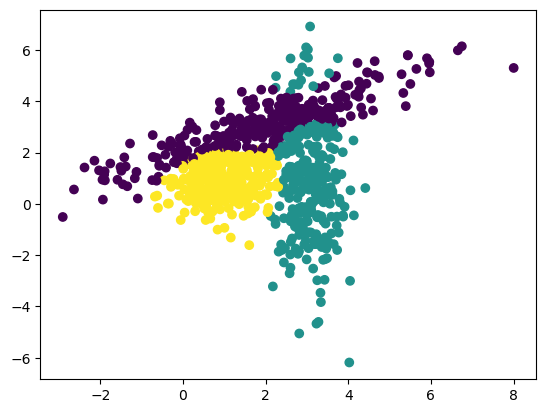

In [15]:
fig,ax = plt.subplots()
Y = gmm.predict(X)
ax.scatter(X[:,0],X[:,1],c=Y)
plt.show()

The method `predict_proba` returns the conditional probabilities:

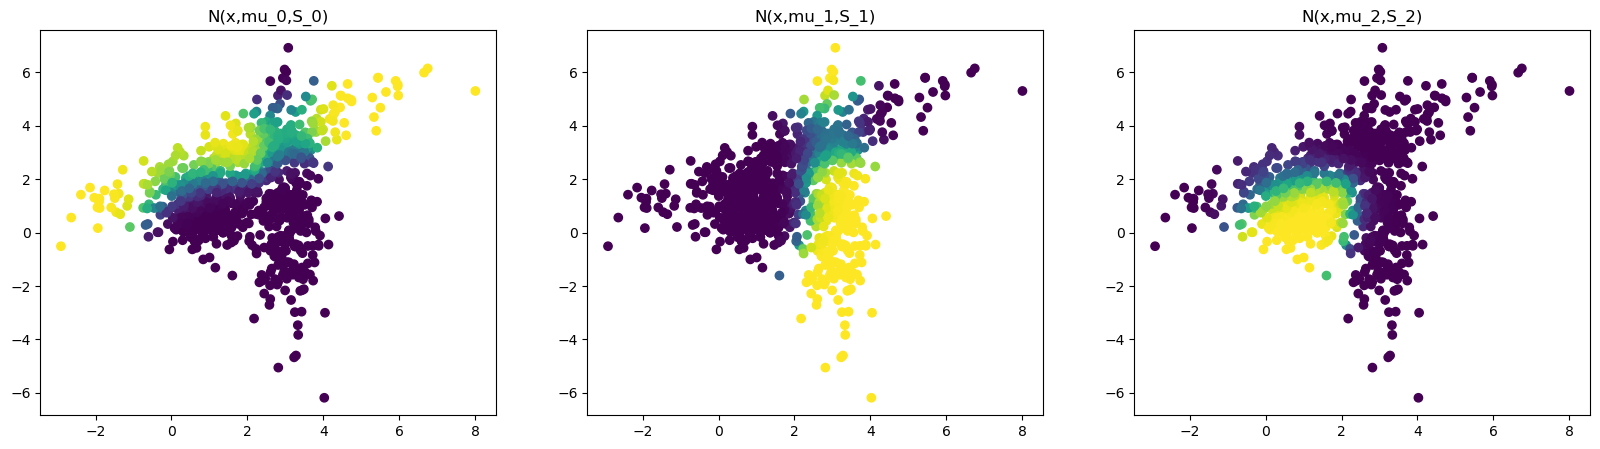

In [16]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
Y = gmm.predict_proba(X)

for i in range(3):
    ax[i].scatter(X[:,0],X[:,1],c=Y[:,i])
    ax[i].set_title(f"N(x,mu_{i},S_{i})")
plt.show()

Now we compute and plot the responsibilities:

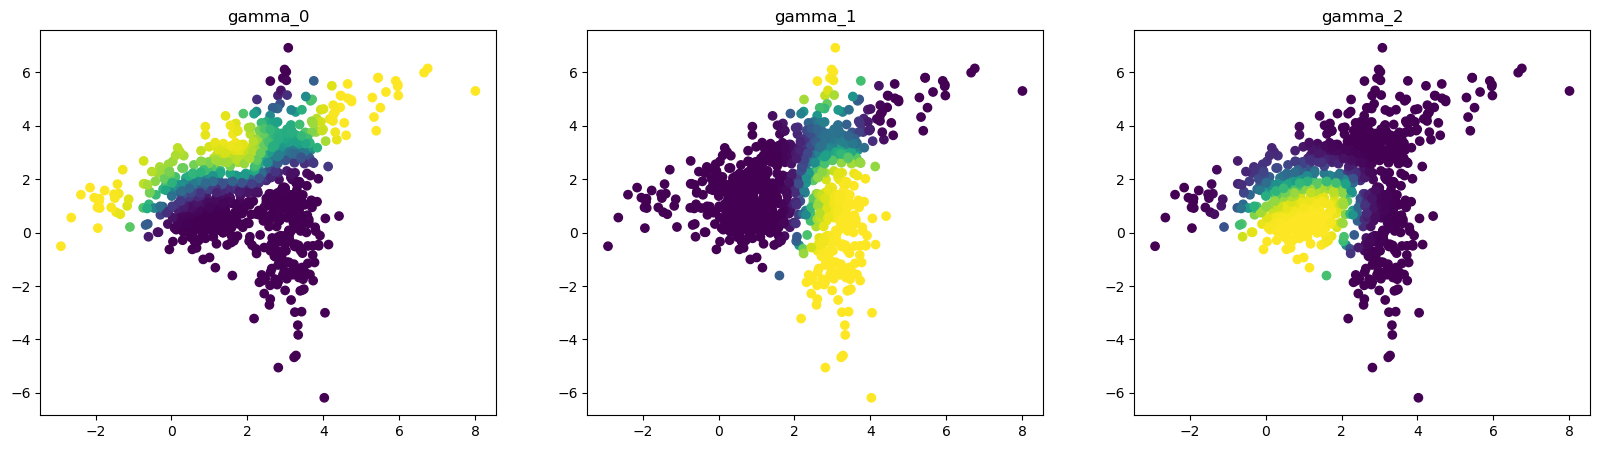

In [17]:
pi = gmm.weights_
gamma_0 = (pi[0]*Y[:,0]) / (pi[0]*Y[:,0]+pi[1]*Y[:,1]+pi[2]*Y[:,2])
gamma_1 = (pi[1]*Y[:,1]) / (pi[0]*Y[:,0]+pi[1]*Y[:,1]+pi[2]*Y[:,2])
gamma_2 = (pi[2]*Y[:,2]) / (pi[0]*Y[:,0]+pi[1]*Y[:,1]+pi[2]*Y[:,2])

fig,ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
ax[0].scatter(X[:,0],X[:,1],c=gamma_0)
ax[0].set_title("gamma_0")
ax[1].scatter(X[:,0],X[:,1],c=gamma_1)
ax[1].set_title("gamma_1")
ax[2].scatter(X[:,0],X[:,1],c=gamma_2)
ax[2].set_title("gamma_2")
plt.show()